In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
df1=df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [6]:
df1.shape

(1258,)

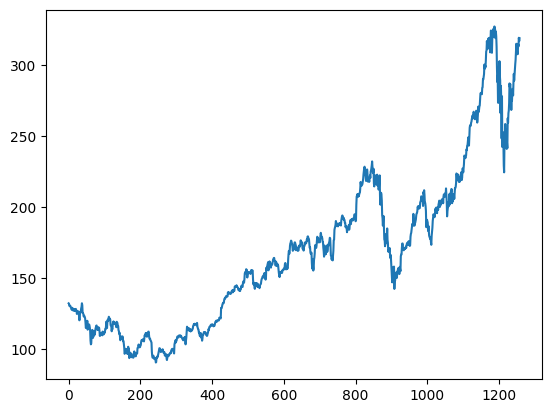

In [7]:
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1


array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]], shape=(1258, 1))

In [9]:
training_size = int(len(df1) * 0.6 )
test_size = int(len(df1)) - training_size
train_data, test_data = df1[0: training_size,: ], df1[training_size:len(df1), :1 ]

In [10]:
training_size, test_size

(754, 504)

In [11]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [12]:
def create_dataset(dataset, timestep = 1):
    dataX, dataY = [], []
    for i in range (len(dataset) - timestep - 1):
        dataX.append(dataset[i: (i+ timestep ), 0])
        dataY.append(dataset[i+timestep , 0])
        return np.array(dataX) , np.array(dataY)
    

In [13]:
timestep = 100
X_train, y_train = create_dataset(train_data, timestep)
X_test, y_test = create_dataset(test_data, timestep)

In [14]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 0.1696994  0.16727181 0.16794731
  0.16473866 0.16174111 0.1581525  0.15654817 0.16271215 0.1614878
  0.1554927  0.15443722 0.15730811 0.15604154 0.15849025 0.15308621
  0.15735033 0.15490163 0.15946129 0.15688592 0.1537195  0.14434687
  0.14812547 0.15308621 0.15241071 0.15055307 0.14924428 0.13607194
  0.12551718 0.13906949 0.14911762 0.14890653 0.15401503 0.16115005
  0.16583636 0.17618002 0.17060711 0.14725998 0.14700667 0.14422021
  0.13691632 0.13949168 0.13784514 0.13522756 0.13071012 0.11863548
  0.10259225 0.1058009  0.10466098 0.10630752 0.12403952 0.09773706
  0.10512539 0.10474542 0.10816516 0.11323144 0.11044499 0.10415435
  0.09419066 0.06510175 0.05395592 0.0565735  0.08169383 0.09533058
  0.09689268 0.09465507 0.07337668 0.09288187 0.08456472 0.07992063
  0.09275521 0.0836359  0.09385291 0.10077683 0.10542092 0.10951617
  0.11006502 0.09955248 0.09756818 0.10499873 0.09735709 0.10124124
  0.10411213 0.10288778 0.09330406 0.07903403 0.0

In [15]:
print(X_test.shape),
print(y_test.shape)

(1, 100)
(1,)


In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

I0000 00:00:1755015576.331263   37808 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6144 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/sahaj/jupyter-env/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2025-08-12 22:08:00.370286: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90501


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0107 - val_loss: 0.3029
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0053 - val_loss: 0.2284
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0021 - val_loss: 0.1650
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.9528e-04 - val_loss: 0.1107
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1.5353e-04 - val_loss: 0.0781
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0011 - val_loss: 0.0729
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0014 - val_loss: 0.0815
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 8.7233e-04 - val_loss: 0.0964
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 3.1697e-04 - val_loss: 0.1131
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3.2099e-05 - val_loss: 0.1287
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.3754e-05 - val_loss: 0.1415
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.653

In [24]:
import tensorflow as tf

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

111.00392282620119

In [29]:
math.sqrt(mean_squared_error(y_test,test_predict))

124.95647066762638

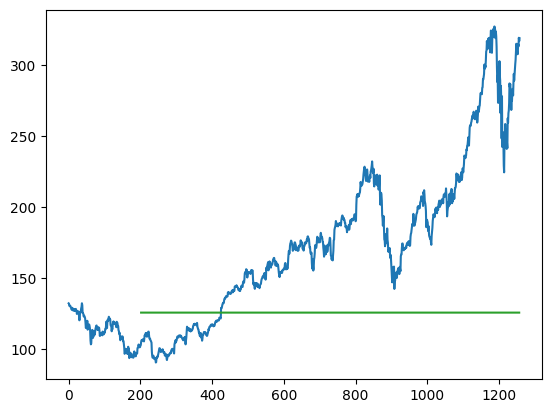

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 163)

In [34]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.5667905091615302,
 0.5430211939542346,
 0.5508739339694335,
 0.5770075149877565,
 0.5772186101494554,
 0.5659883475470744,
 0.5770919530524361,
 0.5900109769484085,
 0.615849024740353,
 0.6144135776408006,
 0.6120915308621127,
 0.6080807227898337,
 0.6119226547327536,
 0.6166934053871487,
 0.634003208646458,
 0.6316811618677702,
 0.6452756902811789,
 0.6469644515747701,
 0.6596301612767037,
 0.6700582622646292,
 0.6457400996369165,
 0.6456134425398972,
 0.6688339103267753,
 0.6986405471586592,
 0.7057333445917422,
 0.7041712403951703,
 0.7046356497509079,
 0.7138816178333194,
 0.7168791691294436,
 0.7255762897914382,
 0.7245630330152835,
 0.7351600101325679,
 0.7274339272143884,
 0.7406062653043994,
 0.7462636156379299,
 0.7428438740184078,
 0.7297559739930761,
 0.7247741281769824,
 0.7238030904331674,
 0.7431816262771258,
 0.7344000675504521,
 0.7493878240310732,
 0.7468969011230264,
 0.7338512201300349,
 0.713966055897999,
 0.7236342143038084,
 0.7398463227222833,
 0.7615046863125

In [36]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.54302119 0.55087393 0.57700751 0.57721861 0.56598835 0.57709195
 0.59001098 0.61584902 0.61441358 0.61209153 0.60808072 0.61192265
 0.61669341 0.63400321 0.63168116 0.64527569 0.64696445 0.65963016
 0.67005826 0.6457401  0.64561344 0.66883391 0.69864055 0.70573334
 0.70417124 0.70463565 0.71388162 0.71687917 0.72557629 0.72456303
 0.73516001 0.72743393 0.74060627 0.74626362 0.74284387 0.72975597
 0.72477413 0.72380309 0.74318163 0.73440007 0.74938782 0.7468969
 0.73385122 0.71396606 0.72363421 0.73984632 0.76150469 0.74550367
 0.75208984 0.761758   0.76467111 0.78024994 0.8001351  0.80245715
 0.79962847 0.80081061 0.7983619  0.81761378 0.81875369 0.84256523
 0.84210082 0.84936249 0.85835515 0.8866419  0.87431394 0.88431985
 0.87836697 0.8986321  0.92582116 0.92877649 0.95676771 0.93869797
 0.93304061 0.94950604 0.96424048 0.95512117 0.95989192 0.96635143
 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453
 0.92172591 0.96474711 0.97572406 0.99159841 0.9697

ValueError: cannot reshape array of size 162 into shape (1,100,1)